# Exploratory Data Analysis & Intro (SEA)

## Exploratory Data Analysis for all Data Roles

### Data Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_SEA = df[df['job_country'].isin(ASEAN)].copy()


c:\Users\tc\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Roles to Explore

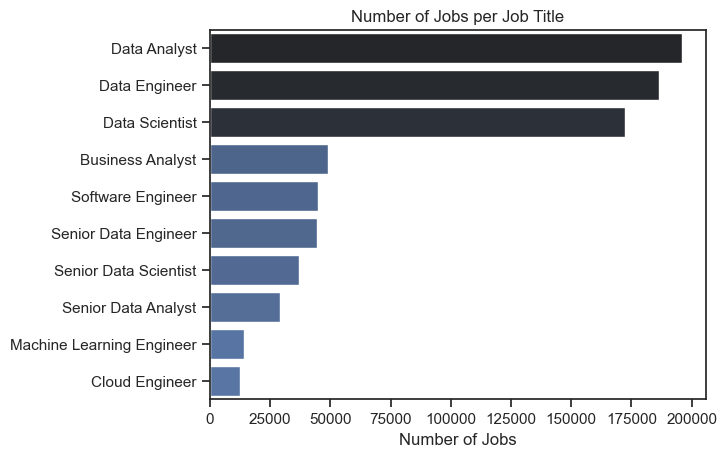

In [17]:
df_plot_WW = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_WW, x='count', y='job_title_short', hue ='count', palette ='dark:b_r', legend = False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Job Title')
plt.show()


### Countries to Explore

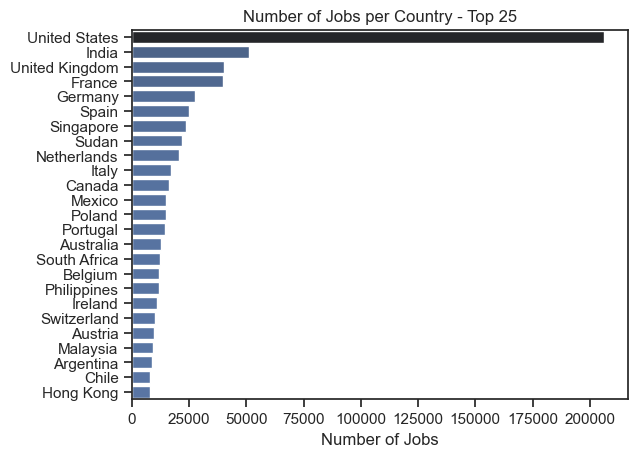

In [37]:
df_plot2 = df['job_country'].value_counts().to_frame().head(25)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot2, x='count', y='job_country', hue='count', palette= 'dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Country - Top 25')
plt.show()

### Companies to Explore

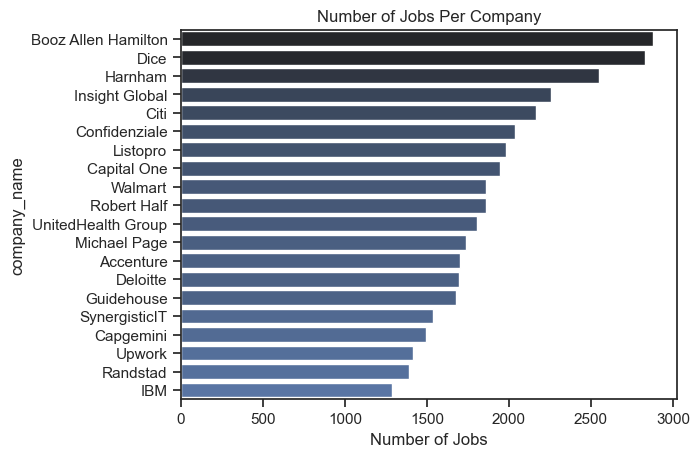

In [46]:
df_plot_WW2 = df['company_name'].value_counts().to_frame()[1:].head(20)

#The top 1 according to the dataset is actually Emprego but not all of Emprego's listing are directly for them as they are a recruitment platform, as such it's excluded

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_WW2, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Number of Jobs Per Company')
plt.xlabel('Number of Jobs')
plt.show()

### Job Benefits & Conditions

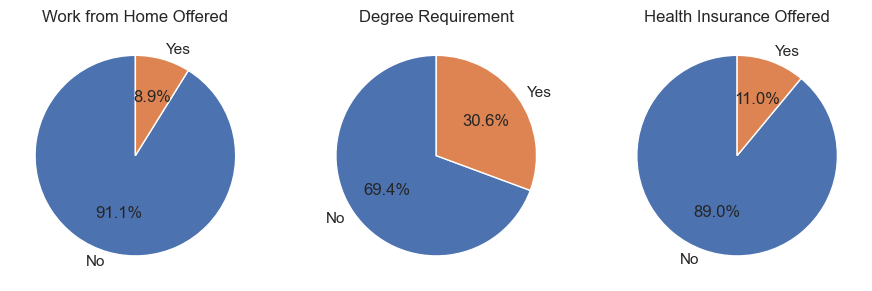

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}
fig, ax = plt.subplots(1, 3, figsize= (11, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle= 90)
    ax[i].set_title(title)
plt.show()

## Exploratory Data Analysis for Data Analysts in the US

### Roles to Explore - ASEAN

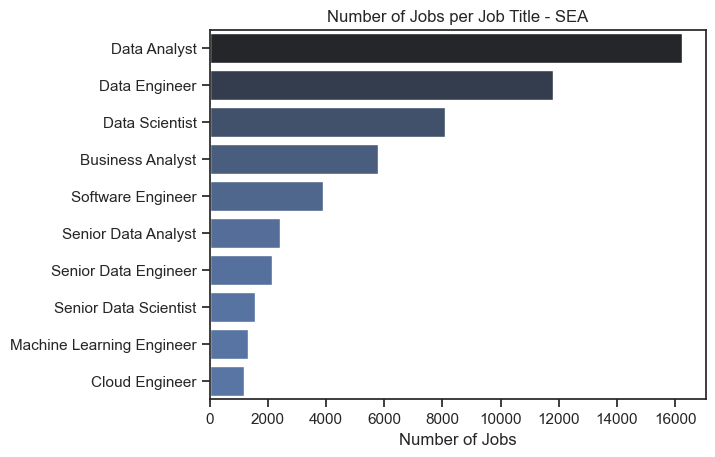

In [36]:
df_plot = df_SEA['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue ='count', palette ='dark:b_r', legend = False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Job Title - SEA')
plt.show()


### Countries to Explore - ASEAN

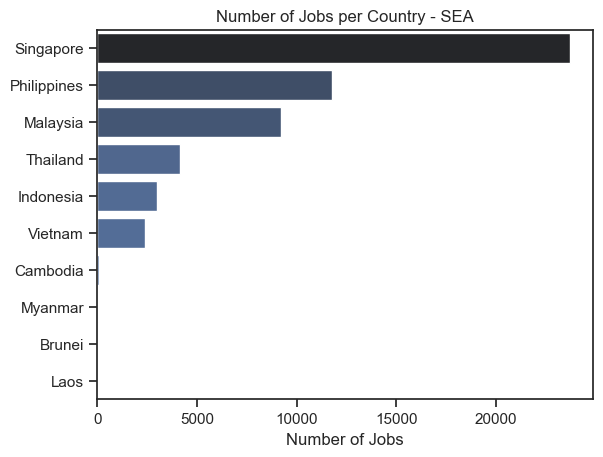

In [38]:
df_plot3 = df_SEA['job_country'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot3, x='count', y='job_country', hue='count', palette= 'dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Number of Jobs per Country - SEA')
plt.show()

### Companies to Explore - ASEAN

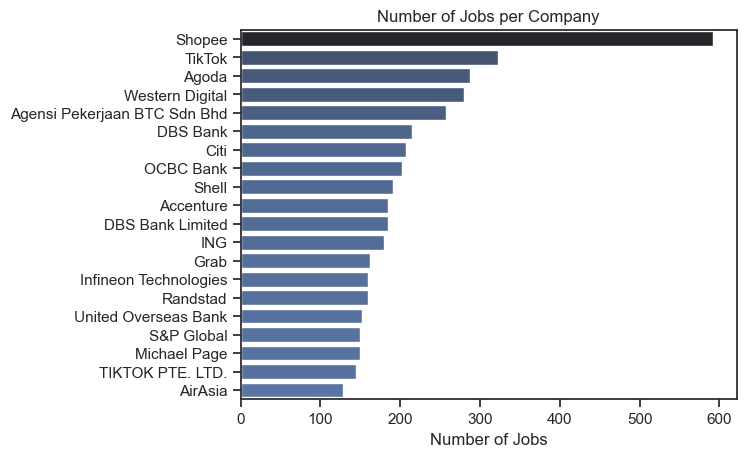

In [8]:
df_plot4 = df_SEA['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data= df_plot4, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Benefits & Conditions - ASEAN

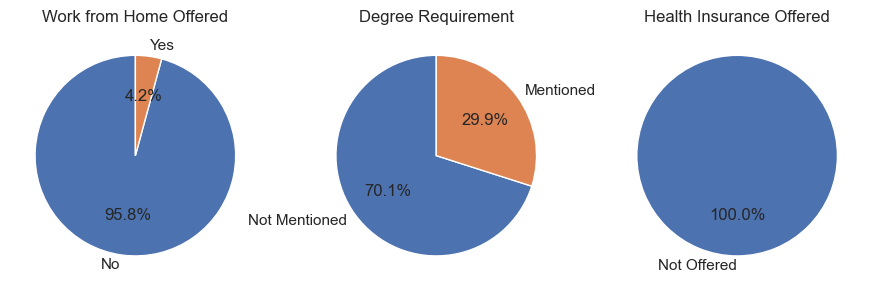

In [38]:
dict_column ={
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize=(11,4))

label_mappings = {
    'job_work_from_home': {1: 'Yes', 0: 'No'},
    'job_no_degree_mention': {1: 'Mentioned', 0: 'Not Mentioned'},
    'job_health_insurance': {1: 'Offered', 0: 'Not Offered'}  # Single label example
}

for i, (column, title) in enumerate(dict_column.items()):
    plot=df_SEA[column].value_counts()
    labelsP=[label_mappings[column].get(val, val) for val in plot.index]
    ax[i].pie(plot, labels=labelsP, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()